# Lab 5: Minimization
***Gavela Maculuve***

### Importing Libraries

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
from minimization import GradientDescent, TestGradientDescent

In [3]:
TestGradientDescent()

-- Testing Gradient Descent Convergence Order --

Test Problem: f(x,y) = x^2 + y^2, Start: [-4.   3.5]
-> Converged to: [-2.51084069e-06  2.19698561e-06]
-> 64 iterations

Expected: [0. 0.]
Absolute Error: 3.336325e-06
Test Passed: Minimum found correctly.
Saved convergence plot to 'minimization_plot\minimization_error.png'



Now you can answer the following question in a jupyter notebook and by importing `minization.py`

## Exercise 1

Compute the gradient of
$$ f(x,y,z) = x^2ye^{xz} +z\cos(xy)$$

In [4]:
x, y, z = sp.symbols('x y z')

In [5]:
equation_1 = (x**2)*y*sp.exp(x*z) + z*sp.cos(x*y)
# Partial derivative with respect to x
df_dx = sp.diff(equation_1, x) 
# Partial derivative with respect to y
df_dy = sp.diff(equation_1, y)
# Partial derivative with respect to z
df_dz = sp.diff(equation_1, z)

In [6]:
print("First Term")
df_dx

First Term


x**2*y*z*exp(x*z) + 2*x*y*exp(x*z) - y*z*sin(x*y)

In [7]:
print("Second Term")
df_dy

Second Term


x**2*exp(x*z) - x*z*sin(x*y)

In [8]:
print("Third Term")
df_dz

Third Term


x**3*y*exp(x*z) + cos(x*y)

### Gradient of $ f(x,y,z) = x^2ye^{xz} +z\cos(xy)$

\begin{gather} 
\nabla f(x,y,z) = (y e^{xz}(2x + x^2 z) - zy \sin(xy); x^2 e^{xz} - xz \sin(xy); x^3 y e^{xz} + \cos(xy)
\end{gather}

## Exercise 2

Compute the first two step of the gradient descent by hand and find the best learning rate
$$f(x,y) = 2x^4y^2,\; x_0=1,y_0=2$$

### Partial Derivation
$f(x,y) = 2x^4y^2,\; x_0=1,y_0=2 $

$\frac{df}{dx} = 8x^3 \times y^2$

$\frac{df}{dy} = 4x^4 \times y$

### Calculating Gradient Descent

$x_0 = 1, y_0 = 2$ (initial guesses)

Alpha = 0.1
#### Step 1:

$\frac{df}{dx} = 1 - 0.1 (8\times1^4 \times 2^2) = 1 - 0.1 \times 32 = -2.2$

$\frac{df}{dy} = 2 - 0.1( 4\times1^4 \times 2) = 2 - 0.1 \times 8 = 1.2 $


 $\nabla f(-2.2, 1.2)$

#### Step 2:  
$x_0 = -0.6, y_0 = 1.6$

$\frac{df}{dx} = -0.6 - 0.1 (8\times-0.6^4 \times 2^(1.2)) \approx 10.066$

$\frac{df}{dy} = 1.6 - 0.1 ( 8\times-0.6^4 \times 1.2) =\approx -10.044 $

$\nabla f(10.066, -10.044)$

---

Alpha = 0.005
#### Step 1:

$\frac{df}{dx} = 1 - 0.05 (8\times1^4 \times 2^2) = 1 - 0.05 \times 32 = 1 - 1.6= -0.6$

$\frac{df}{dy} = 2 - 0.05 ( 4\times1^4 \times 2) = 2 - 0.05 \times 8 = 2 - 0.4 = 1.6 $


 $\nabla f(-0.6, 1.6)$

#### Step 2:  
$x_0 = -0.6, y_0 = 1.6$

$\frac{df}{dx} = -0.6 - 0.05 (8\times-0.6^4 \times 2^(1.6)) = -0.6 - 0.05 \times -4.42368 = -0.6 + 0.22118 \approx -0.3788$

$\frac{df}{dy} = 1.6 - 0.05 ( 4\times-0.6^4 \times 1.6) = 1.6 - 0.05 \times 0.82944 = 1.6 - 0.04147 \approx 1.5585 $

$\nabla f(-0.3788, 1.5585)$

***Best Learning Rate is 0.05*** as:
- Nothing oscillates.
- Nothing blows up.
- And steps shrink naturally as you approach the minimum.


## Exercise 3

Minimize the function below
$$D(x_1,x_2)=2x_1^2 + 2x_1x_2 + 2x_2^2 -\sqrt{6}x_1 $$

In [9]:
equation_2 = 2*x**2 + 2*x*y + 2*y**2- x*sp.sqrt(6)

In [10]:
# Partial derivative with respect to x
df_dx_1 = sp.diff(equation_2, x) 
# Partial derivative with respect to y
df_dy_1 = sp.diff(equation_2, y)

In [11]:
gx = sp.lambdify((x,y), df_dx_1, 'numpy')
gy = sp.lambdify((x,y), df_dy_1, 'numpy')

In [12]:
def DF_1(v):
    x, y = v
    return np.array([gx(x,y), gy(x,y)])

In [13]:
start_pos = [1, 0.5]
min_point, i, _ = GradientDescent(DF_1, start_pos, 0.1, 60, 1e-6)
print(f" Minimum point = {min_point}, {i} iterations.")

 Minimum point = [ 0.81649393 -0.40824564], 53 iterations.


In [14]:
# Analytical check
actual_x = np.sqrt(6)/3
actual_y = -np.sqrt(6)/6
print(f"Analytical target: [{actual_x:.8f}  {actual_y:.8f}]")

error_1 = np.abs(min_point - [actual_x, actual_y])
print(f"Error: {error_1}")

Analytical target: [0.81649658  -0.40824829]
Error: [2.64803954e-06 2.64803954e-06]


## Exercise 4

Minimize the function
$$ f(x_1,x_2) = (1-2x_2)^2+(x_1-2x_2^2)^2-2$$

In [15]:
equation_3 = (1-2*y)**2 + (x - 2*y**2)**2 - 2

df_dx_2 = sp.diff(equation_3, x) 
df_dy_2 = sp.diff(equation_3, y)

gx_2 = sp.lambdify((x,y), df_dx_2, 'numpy')
gy_2 = sp.lambdify((x,y), df_dy_2, 'numpy')

# DF_2 = lambda x, y: x,y = v, return np.array([gx_2(x,y), gy_2(x,y)])
def DF_2(v):
    x, y = v
    return np.array([gx_2(x,y), gy_2(x,y)])

start_pos_2 = [0.2, 1]
min_point_2, i2, _ = GradientDescent(DF_2, start_pos_2, 0.1, 150, 1e-6)
print(f" Minimum point = {min_point_2}, {i2} iterations.")

 Minimum point = [0.50000912 0.50000242], 106 iterations.


In [16]:
# Analytical check
actual_y_2 = 1/2
actual_x_2 = 2*actual_y_2**2
print(f"Analytical target: [{actual_x_2:.8f}  {actual_y_2:.8f}]")

error_2 = np.abs(min_point_2 - [actual_x_2, actual_y_2])
print(f"Error: {error_2}")

Analytical target: [0.50000000  0.50000000]
Error: [9.12330021e-06 2.42282603e-06]


## Exercise 5
Minimize the function
$$ f(x,y) = 2x^2–4xy+5y^2−4y+3$$

In [17]:
equation_4 = 2*x**2 - 4*x*y + 5*y**2 - 4*y + 3

df_dx_3 = sp.diff(equation_4, x) 
df_dy_3 = sp.diff(equation_4, y)

gx_3 = sp.lambdify((x,y), df_dx_3, 'numpy')
gy_3 = sp.lambdify((x,y), df_dy_3, 'numpy')

DF_3 = lambda v: np.array([gx_3(v[0], v[1]), gy_3(v[0], v[1])])

start_pos_3 = [1, 1]
min_point_3, i3, _ = GradientDescent(DF_3, start_pos_3, 0.1, 100, 1e-10)
print(f" Minimum point = {min_point_3}, {i3} iterations.")

 Minimum point = [0.66666667 0.66666667], 94 iterations.


In [18]:
# f_x = 4x - 4y = 0  => x = y
# f_y = -4x + 10y - 4 = 0 => -4(y) + 10y = 4 => 6y = 4 => y = 2/3

actual_val = 2/3
print(f"Analytical target: [{actual_val:.8f}  {actual_val:.8f}]")

error_3 = np.abs(min_point_3 - [actual_val, actual_val])
print(f"Error: {error_3}")

Analytical target: [0.66666667  0.66666667]
Error: [3.10827031e-10 1.55413460e-10]


## Exercise 6

Assume you have the following data.

| Size (sq. ft.) | Age (years) | Price ($1000s) |
|----------------|-------------|----------------|
| 1500           | 5           | 300            |
| 2000           | 10          | 350            |
| 1200           | 2           | 250            |
| 1800           | 8           | 320            |
| 2200           | 15          | 380            |
| 1600           | 3           | 290            |
| 2500           | 20          | 400            |
| 1900           | 12          | 340            |
| 1700           | 7           | 310            |

Compute by hand the error for linear regression model 
$$(Price) y  = 0.1\cdot Size + 2\cdot Age +100$$

| | Size | Age | Price (y) | Predicted ($\hat y$) | Residual $(r=y-\hat y)$ |$\sum_{i}r^2$
| -: | ---: | --: | ---------: | -----------------: | --------------------: |-----:|
|  1 | 1500 |   5 |        300 |              260.0 |                  40.0 |1600|
|  2 | 2000 |  10 |        350 |              320.0 |                  30.0 |900|
|  3 | 1200 |   2 |        250 |              224.0 |                  26.0 |676|
|  4 | 1800 |   8 |        320 |              296.0 |                  24.0 |576|
|  5 | 2200 |  15 |        380 |              350.0 |                  30.0 |900|
|  6 | 1600 |   3 |        290 |              266.0 |                  24.0 |576|
|  7 | 2500 |  20 |        400 |              390.0 |                  10.0 |100|
|  8 | 1900 |  12 |        340 |              314.0 |                  26.0 |676|
|  9 | 1700 |   7 |        310 |              284.0 |                  26.0 |676|
|Sum|16400|82|2940|2704|236|6680

$$SSE = \sum_{i}^N r^2 = \sum_{i=1}^9 r_i^2 = 6680$$

$$Error = \frac{SSE}{N} = \frac{6680}{9} \approx 742.22$$

$$ RMSE = \sqrt(Error) \approx 27.2438$$

<img src="Exercise 6.jpeg" width="500" height="300">

## Using the three forms you requested for 
### (I am not sure if this is necessary or if you asked us to do this for this number)

### 1) MSE

$$F(m_1, m_2, b) = \frac{1}{N}\sum_{i=1}^N (Price_i - (m_1\cdot Size + m_2 \cdot Age +b))^2$$


$$DF(m_1, m_2, b) =  \begin{bmatrix}-\frac{2}{N}\sum_{i=1}^N Size_i\cdot(Price_i - (m_1\cdot Size + m_2 \cdot Age +b))\\ -\frac{2}{N}\sum_{i=1}^N Age_i\cdot(Price_i - (m_1\cdot Size + m_2 \cdot Age +b))\\  -\frac{2}{N}\sum_{i=1}^N (Price_i - (m_1\cdot Size + m_2 \cdot Age +b)) \end{bmatrix}$$

$$DF(m_1, m_2, b) =  -\frac{2}{N} \begin{bmatrix}\sum_{i=1}^N Size_i \cdot r\\ \sum_{i=1}^N Age_i\cdot r\\ \sum_{i=1}^N r\end{bmatrix}$$

$\sum_{i=1}^N Size_i \cdot r = 417400 $

$\sum_{i=1}^N Age_i \cdot r = 1960$

$\sum_{i=1}^N  r = 236 $


$$DF(m_1, m_2, b) =  -\frac{2}{9} \begin{bmatrix} 417400\\ 1960\\ 236\end{bmatrix} \approx \begin{bmatrix} −92755.56\\-435.56\\−52.44\end{bmatrix} $$

### 2) Gradient = 0

$$DF(m_1, m_2, b) =  \begin{bmatrix}-\frac{2}{N}\sum_{i=1}^N Size_i\cdot(Price_i - (m_1\cdot Size + m_2 \cdot Age +b))\\ -\frac{2}{N}\sum_{i=1}^N Age_i\cdot(Price_i - (m_1\cdot Size + m_2 \cdot Age +b))\\  -\frac{2}{N}\sum_{i=1}^N (Price_i - (m_1\cdot Size + m_2 \cdot Age +b)) \end{bmatrix}$$
and we solve
$$DF(m_1, m_2, b) = 0 \Longleftrightarrow \begin{bmatrix} A\cdot[m_1, m_2, b]= v \end{bmatrix}$$

where
$$\mathbf{A} =\begin{bmatrix}
\sum Size^2 & \sum (Size \cdot Age) & \sum Size\\
\sum (Size \cdot Age) & \sum Age^2 & \sum Age\\
\sum Size & \sum Age & \sum N
\end{bmatrix}, 
v =  \begin{bmatrix}
\sum (Size \cdot Price) \\
\sum (Age \cdot Price) \\
\sum (Price)
\end{bmatrix}$$

$$\mathbf{A} = \begin{bmatrix}
31080000 & 166800 & 16400\\
166800 & 1020 & 82\\
16400 &  82 & 9
\end{bmatrix}, 
 v =  \begin{bmatrix}
5499000\\
28880 \\
2940
\end{bmatrix}$$

$$\begin{bmatrix}
m_1\\
m_2 \\
b
\end{bmatrix} =  \begin{bmatrix}
0.09402930\\
1.68315018 \\
139.98901099
\end{bmatrix}$$

$${Price} = 0.09403 \cdot {Size} + 1.68316 \cdot {Age} + 139.989$$

### 3) Absolute Error

$$F(m_1, m_2, b) = \frac{1}{N}\sum_{i=1}^N |Price_i - (m_1\cdot Size + m_2 \cdot Age +b)|$$


$$DF(m_1, m_2, b) =  -\frac{1}{N} \begin{bmatrix}\sum_{i=1}^N Size_i \cdot sign(r_i)\\ \sum_{i=1}^N Age_i\cdot sign(r_i)\\ \sum_{i=1}^N sign(r_i)\end{bmatrix}$$

$sign(r_i) = +1$ for all values in i

$$DF(m_1, m_2, b) =  -\frac{1}{9} \begin{bmatrix}
16400\\ 
82\\ 
9\end{bmatrix} = \begin{bmatrix}
-1822.22\\ 
-9.11\\ 
-1\end{bmatrix}$$

## Exercise 7

The file `car_efficiency.csv` contains the MPGs and the weights of different cars.

In [19]:
import pandas as pd
df = pd.read_csv("/Users/Gavela Maculuve/PycharmProjects/MATH 240/projects/project 5/car_efficiency.csv") # read the csv file and put the data into the data frame df
df.head(10)

,Mileage,Weight
0,13,1695.000
1,15,1548.000
2,14,1548.000
3,15,1560.000
4,24,1445.976
5,17,1725.930
6,19,1519.000
7,11,1650.000
8,16,1911.660
9,14,2018.115


In [20]:
values = df.values # puit all the values of the data frame into an array values, where the first column is x and the second colum is y
n = len(values)
x_ = values[:,0]
y_ = values[:,1]

1.  Plot as a scatter plot the data

In [21]:
import matplotlib.pyplot as plt

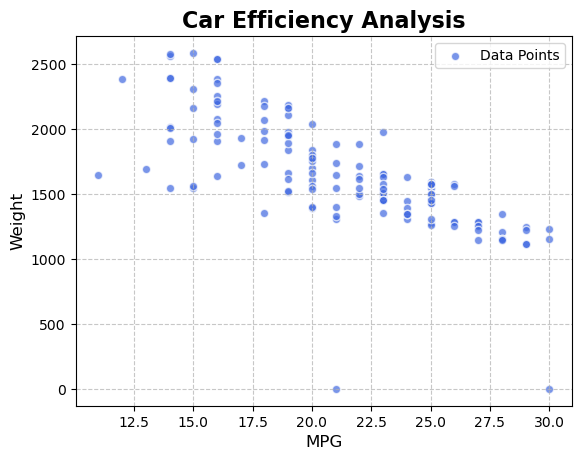

In [22]:
plt.scatter(x_, y_, c = "royalblue", alpha = 0.7, edgecolors='white', label='Data Points')

plt.title("Car Efficiency Analysis", fontsize=16, fontweight='bold')
plt.xlabel("MPG", fontsize=12)
plt.ylabel("Weight", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')

plt.show()

2.  Find the linear regression model, this means, let x=MPG of the ith car and y=weight of the ith car.
$$y_i \approx m\cdot x_i + b$$

In [23]:
def DF_5(v):
    m, b = v
    
    y_pred = m * x_ + b
    error_ = y_pred - y_

    DF_dm = (2/n) * np.sum(error_ * x_)
    DF_db = (2/n) * np.sum(error_)
    
    return np.array([DF_dm, DF_db])

In [24]:
start_pos_5 = [0.1, 0.1]
alpha = 0.001
min_points_4, i4, _ = GradientDescent(DF_5, start_pos_5, alpha, 100000, 1e-8)
m_,b_ = min_points_4

In [25]:
print(f"Linear Regression Model: y = {m_:.4f}x + {b_:.4f}, {i4} iterations")

Linear Regression Model: y = -68.7490x + 3112.0367, 100000 iterations


3.  Find the quadratic regression model, this means.
$$y_i \approx m_2\cdot x_i^2+ m_1\cdot x_i + b$$

In [26]:
def DF_6(v):
    m2, m1, b = v
    
    y_pred = m2*(x_**2) + m1*x_ +b
    error = y_pred - y_

    DF_dm2 = (2/n) * np.sum(error * (x_**2))
    DF_dm1 = (2/n) * np.sum(error * x_)
    DF_db = (2/n) * np.sum(error)
    return np.array([DF_dm2, DF_dm1, DF_db])

In [27]:
start_pos_6 = [-1.0, -30, 2600]
alpha = 1e-7
min_points_5, i5, _ = GradientDescent(DF_6, start_pos_6, alpha, 100000, 1e-8)
m2, m1, b2 = min_points_5

In [28]:
print(f"Quadratic Regression Model: y = {m2:.4f}x^2 + {m1:.4f}x + {b2:.4f}, {i5} iterations")

Quadratic Regression Model: y = -0.8229x^2 + -27.0048x + 2600.2922, 100000 iterations


4. Plot the scatter plot of the data with the regression line.

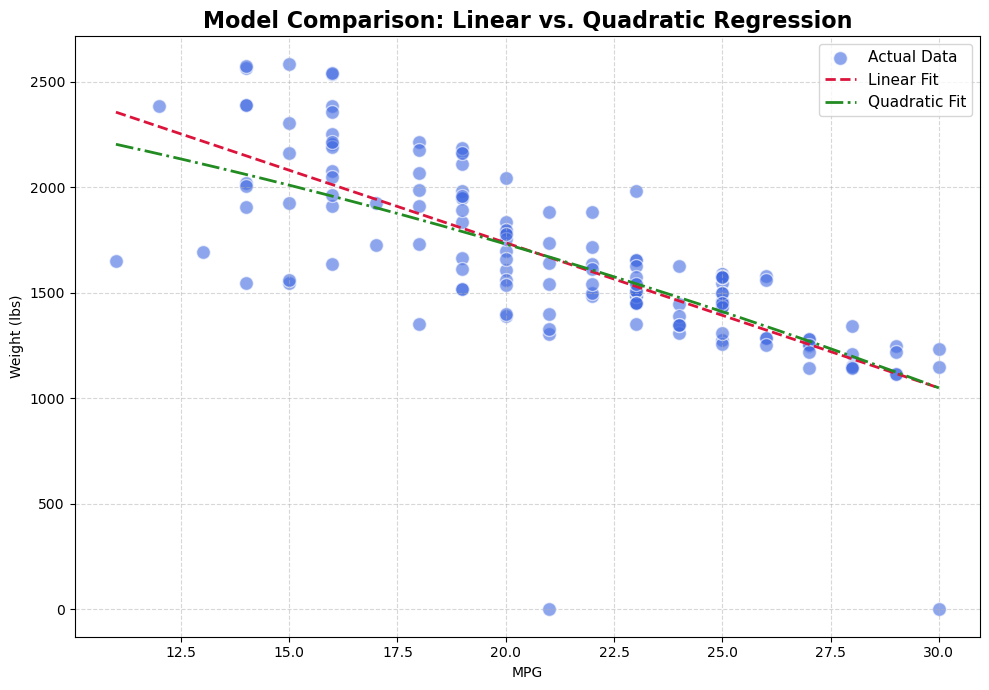

In [29]:
new_x = np.linspace(min(x_), max(x_), 200)

ylin = m_ * new_x + b_
yquad= m2 * (new_x**2) + m1 * new_x + b2

plt.figure(figsize=(10, 7))
plt.scatter(x_, y_, c="royalblue", s=100, alpha=0.6, edgecolors='w', label='Actual Data', zorder=1)
plt.plot(new_x, ylin, color="crimson", linestyle="--", linewidth=2, label='Linear Fit')
plt.plot(new_x, yquad, color="forestgreen", linestyle="-.", linewidth=2, label='Quadratic Fit')

plt.title("Model Comparison: Linear vs. Quadratic Regression", fontsize=16, fontweight='bold')
plt.xlabel("MPG")
plt.ylabel("Weight (lbs)")
plt.legend(fontsize=11)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

5. Estimate the weight of a car if the mileage is 32 MPG

In [30]:
mpg_val = 32
predicted_weight_linear = m_ * mpg_val + b_
predicted_weight_quadratic = m2 * (mpg_val**2) + m1 * mpg_val + b2

print(f"Linear Model Prediction (32 MPG): {predicted_weight_linear:.4f} lbs")
print(f"Quadratic Model Prediction (32 MPG): {predicted_weight_quadratic:.4f} lbs")

Linear Model Prediction (32 MPG): 912.0681 lbs
Quadratic Model Prediction (32 MPG): 893.4402 lbs


In [31]:
# # Safety check for exploding gradients (NaN)
#         if np.any(np.isnan(params)) or np.any(np.isinf(params)):
#             print(f"Warning: Diverged at iteration {i}. Try lowering learning_rate.")
#             return params, i

## Exercise 8
Find a data set with at least 2 feature (this means x has to be of dimension 2 or more) and find the linear regression line to predict the label y.

In [32]:
icecream = {
    'Temperature': [21, 34, 28, 25, 22, 37, 21, 22, 16, 29, 20, 24, 32, 17],
    'Price': [5, 8, 6, 4, 2, 6, 3, 2, 8, 8, 7, 6, 5, 2],
    'Sales': [212, 279, 263, 278, 279, 349, 258, 284, 98, 233, 158, 218, 321, 220]
}

ic = pd.DataFrame(icecream)
ic

,Temperature,Price,Sales
0,21,5,212
1,34,8,279
2,28,6,263
3,25,4,278
4,22,2,279
5,37,6,349
6,21,3,258
7,22,2,284
8,16,8,98
9,29,8,233


In [33]:
values_ = ic.values # puit all the values of the data frame into an array values, where the first column is x and the second colum is y
n_2 = len(values_)
x_1 = values_[:,0]
x_2 = values_[:,1]
y_2 = values_[:, 2]

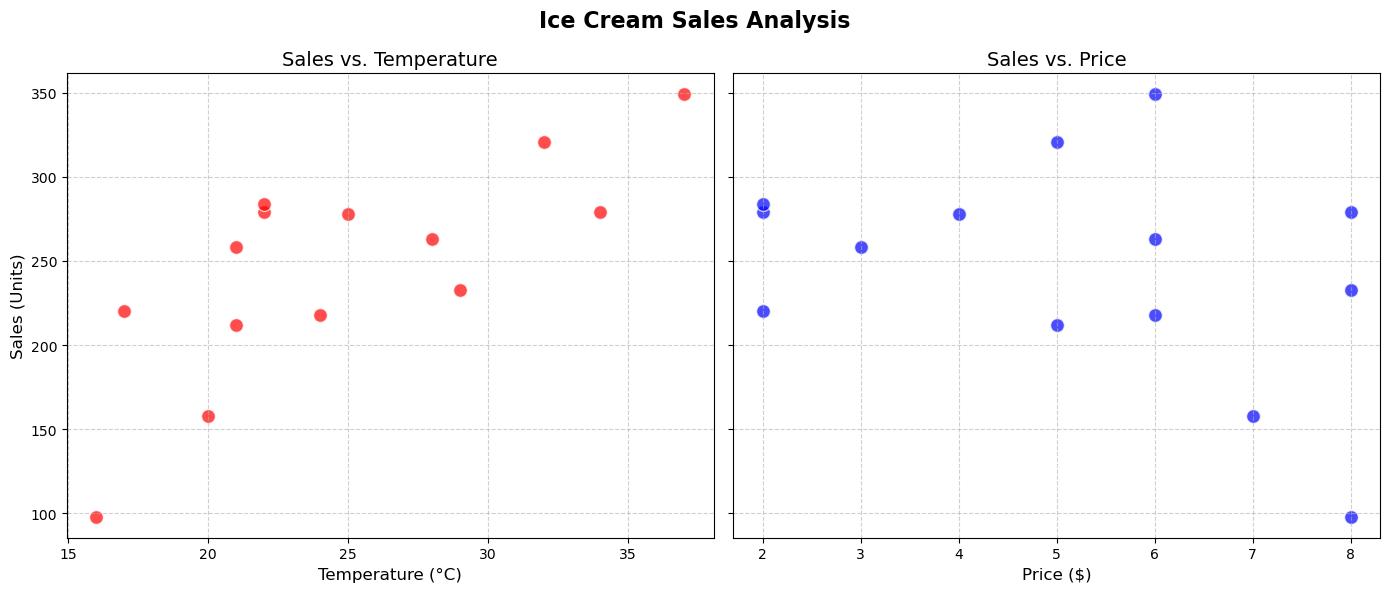

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("Ice Cream Sales Analysis", fontsize=16, fontweight='bold')

ax[0].scatter(x_1, y_2, color='red', alpha=0.7, edgecolors='white', s=100)
ax[0].set_title("Sales vs. Temperature", fontsize=14)
ax[0].set_xlabel("Temperature (°C)", fontsize=12)
ax[0].set_ylabel("Sales (Units)", fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)

ax[1].scatter(x_2, y_2, color='blue', alpha=0.7, edgecolors='white', s=100)
ax[1].set_title("Sales vs. Price", fontsize=14)
ax[1].set_xlabel("Price ($)", fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [35]:
def DF_7(v):
    m1, m2, b = v
    
    y_pred = m1 * x_1  + m2 * x_2 + b
    error_ = y_pred - y_2

    DF_dm1 = (2/n_2) * np.sum(error_ * x_1)
    DF_dm2 = (2/n_2) * np.sum(error_ * x_2)
    DF_db = (2/n_2) * np.sum(error_)
    
    return np.array([DF_dm1, DF_dm2, DF_db])
    
start_pos_5 = [0,0,0]
alpha = 0.001
min_points_6, i6, _ = GradientDescent(DF_7, start_pos_5, alpha, 1000, 1e-8)
m3, m4, b3 = min_points_6

In [36]:
print(f"x1 = {m3} \t x2 = {m4} \t b = {b3}\n")
print(f"Linear Regression Model: y = {m3:.4f}x_1 + {m4:.4f}x_2 + {b3:.4f}, {i6} iterations")

x1 = 13.045892247005767 	 x2 = -17.99233151227084 	 b = 9.95126167752229

Linear Regression Model: y = 13.0459x_1 + -17.9923x_2 + 9.9513, 1000 iterations


In [37]:
weather = 40
cost = 8

In [38]:
predicted_sales = m3 * weather  + m4 * cost + b3

print(f"Linear Model Prediction (40°C): {predicted_sales:.4f}")

Linear Model Prediction (40°C): 387.8483


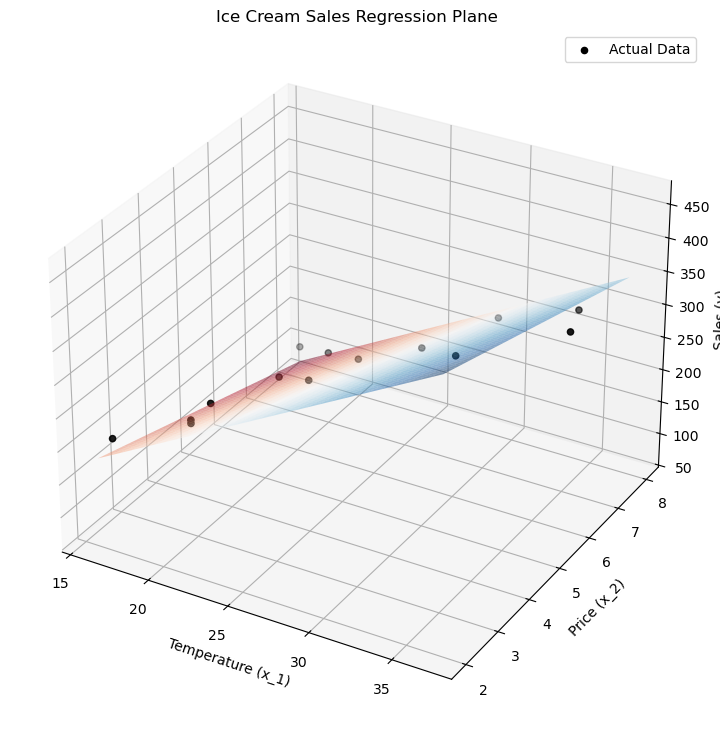

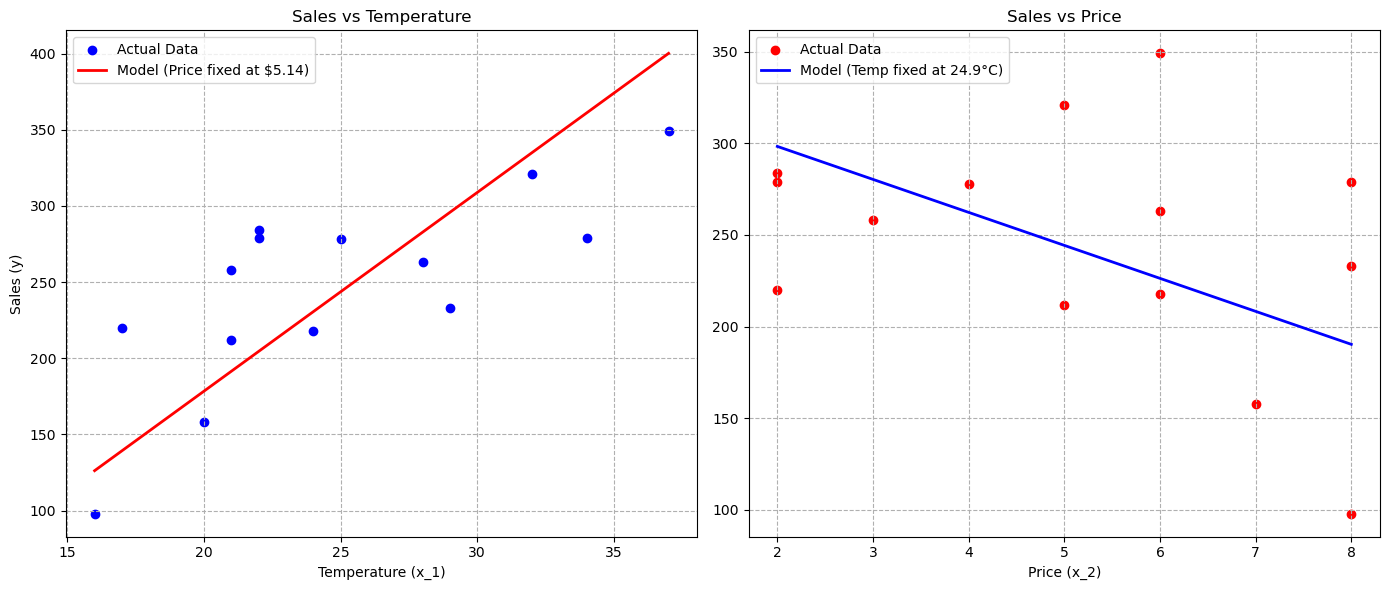

In [39]:
# 3d Image
#grid for the plane
x1_grid = np.linspace(x_1.min(), x_1.max(), 30)
x2_grid = np.linspace(x_2.min(), x_2.max(), 30)

# Create the mesh
X1g, X2g = np.meshgrid(x1_grid, x2_grid)

Yg = m3 * X1g + m4 * X2g + b3

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(projection='3d')

# Scatter actual data points
ax.scatter(x_1, x_2, y_2, color='black', label='Actual Data')
ax.plot_surface(X1g, X2g, Yg, alpha=0.5, cmap='RdBu')

ax.set_xlabel("Temperature (x_1)")
ax.set_ylabel("Price (x_2)")
ax.set_zlabel("Sales (y)")
ax.set_title("Ice Cream Sales Regression Plane")

plt.legend()
plt.show()

## 2nd vizualization

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PLOT A: Sales vs Temperature
mean_price = x_2.mean()
axes[0].scatter(x_1, y_2, label='Actual Data', color='blue')
x_vals_temp = np.linspace(x_1.min(), x_1.max(), 100)
y_vals_temp = m3 * x_vals_temp + (m4 * mean_price + b3)

axes[0].plot(x_vals_temp, y_vals_temp, 'r-', linewidth=2, label=f'Model (Price fixed at ${mean_price:.2f})')
axes[0].set_xlabel('Temperature (x_1)')
axes[0].set_ylabel('Sales (y)')
axes[0].set_title('Sales vs Temperature')
axes[0].legend()
axes[0].grid(True, linestyle='--')


# PLOT B: Sales vs Price
mean_temp = x_1.mean()
axes[1].scatter(x_2, y_2, label='Actual Data', color='red')
x_vals_price = np.linspace(x_2.min(), x_2.max(), 100)
y_vals_price = m4 * x_vals_price + (m3 * mean_temp + b3)

axes[1].plot(x_vals_price, y_vals_price, 'b-', linewidth=2, label=f'Model (Temp fixed at {mean_temp:.1f}°C)')
axes[1].set_xlabel('Price (x_2)')
axes[1].set_title('Sales vs Price')
axes[1].legend()
axes[1].grid(True, linestyle='--')

plt.tight_layout()
plt.show()

### **Thank You!**